# Practicals for lecture 1.0

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/practicals/Practicals_1.0.ipynb)

## Introduction to `numpy`

#### 1.0.0 Creating numpy arrays

In [2]:
import numpy as np

In [2]:
# Create a numpy array from this list:

my_list = [3,2,4,5,6,1]
np.array(my_list)

array([3, 2, 4, 5, 6, 1])

In [4]:
# Initialize a numpy array full of zeros of shape (3, 2, 10) with np.zeros. 
# Check its `shape` attribute to make sure it is correct!
my_arr = np.zeros((3, 2, 10))
my_arr.shape

(3, 2, 10)

In [5]:
# Initialize a numpy array full of ones of shape (3, 2, 10) with np.ones. Make it of data type np.uint16!

my_arr = np.ones((3, 2, 10), dtype=np.uint16)
my_arr

array([[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]], dtype=uint16)

In [7]:
# Initialize an array of shape (3, 2, 10) full of nans with np.full

my_arr = np.full((3, 2, 10), np.nan)
my_arr

array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]])

In [10]:
# Initialize an array containing all even numbers from 0 to 100

np.arange(0, 100, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [12]:
# Google (or ask chatGPT) how to use np.random to generate normally distributed values. 
# Then, create an array of normally distributed values and shape (4,5,2) called random_matrix.

np.random.seed(42)  # keeping this line, we make sure the result is random but always the same when we run!

random_matrix = np.random.normal(0, 1, (4,5,2))
random_matrix

array([[[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696],
        [ 1.57921282,  0.76743473],
        [-0.46947439,  0.54256004]],

       [[-0.46341769, -0.46572975],
        [ 0.24196227, -1.91328024],
        [-1.72491783, -0.56228753],
        [-1.01283112,  0.31424733],
        [-0.90802408, -1.4123037 ]],

       [[ 1.46564877, -0.2257763 ],
        [ 0.0675282 , -1.42474819],
        [-0.54438272,  0.11092259],
        [-1.15099358,  0.37569802],
        [-0.60063869, -0.29169375]],

       [[-0.60170661,  1.85227818],
        [-0.01349722, -1.05771093],
        [ 0.82254491, -1.22084365],
        [ 0.2088636 , -1.95967012],
        [-1.32818605,  0.19686124]]])

#### 1.0.1 Indexing and plotting

In [16]:
np.random.seed(42)

random_matrix = np.random.normal(0, 1, (4, 5))

In [18]:
random_matrix

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
       [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ]])

In [17]:
# use numpy indexing to address the element (0, 1) (first row, second column) from random_matrix above:

random_matrix[0, 1]

-0.13826430117118466

In [20]:
# use numpy indexing to select all values in the second row from random_matrix above:

random_matrix[1, :]

array([-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [24]:
# Set to np.nan all the negative entries of the matrix below:
np.random.seed(42)
random_matrix = np.random.normal(0, 1, (3,2))

random_matrix[random_matrix < 0] = np.nan

random_matrix

array([[0.49671415,        nan],
       [0.64768854, 1.52302986],
       [       nan,        nan]])

(145, 484)


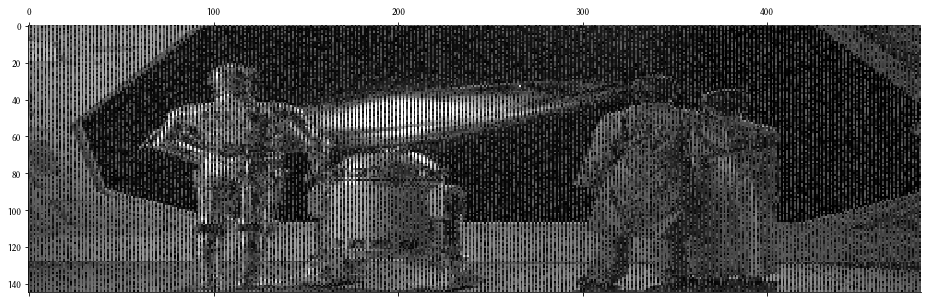

In [17]:
# Images are just matrices! This is one of the reasons working with matrices is so important!
# (Usually images are H x W x 3 arrays, with the third dimension storing the values
# for each of the RGB channels. Here the image will be grayscale and only 2D).

# Use the function below to download an image, and print the shape of the array to know the number of pixels. 
# Then, use plt.matshow to visualize it.

def fetch_image():
    """Fetch exercise data from github repo. 
    
    Returns:
        np.ndarray
            Array with the exercise data.
    
    """
    
    # You should never import stuff in a function! I'm doing it here
    # just to keep together all the code that you don't really need to read now.
    import numpy as np
    import requests
    from io import BytesIO

    # URL of the .npy file on GitHub:
    URL = "https://github.com/vigji/python-cimec/raw/main/practicals/data/corrupted_img.npy"

    response = requests.get(URL)
    
    return np.load(BytesIO(response.content))


# Tip 1: remember to import matplotlib.pyplot first - and give it an alias! ("import ... as ...")
# Tip 2: to make the image grayscale, you can pass the cmap="gray" argument to the matshow() function!

img = fetch_image()
print(img.shape)

from matplotlib import pyplot as plt

plt.matshow(img, cmap="gray")

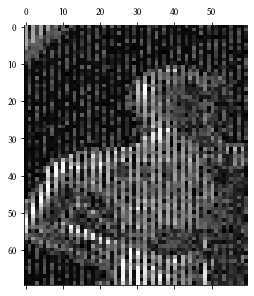

In [18]:
# It looks like the image got corrupted with some noise! 
# To understand the noise pattern, you can try to look closer to it.
# Zoom in the image: plot it again, but selecting a small region using indexing 
# (e.g., im_corr[10:80, 70:130])

plt.matshow(img[10:80, 70:130], cmap="gray")

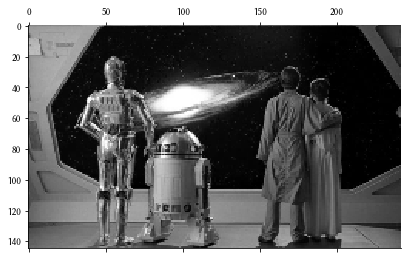

In [19]:
# Can you understand what is going on? Can you think of an indexing strategy 
# that would filter out the noise? (maybe excluding some entries...)
# Try to retrieve the uncorrupted image with an indexing operation, and plot it!

plt.matshow(img[:, ::2], cmap="gray")


#### 1.0.2 Operations with arrays

In [3]:
# Create an array with a range of numbers from 1 to 10 (not from 0 to 9!), 
# then elevate each element to the power of 2:
np.arange(1, 11) ** 2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [7]:
# Use np.stack to create a 10*10 matrix with rows of identical values going from 0 to 9, in this way:

# final_matrix = [[0,0,0,0,0,...],
#                 [1,1,1,1,1,...],
#                 [2,2,2,2,2,...],
#                 [.., .., .., ]]

# Hint: you can use a list comprehension to create the list of arrays to pass to np.stack()!

np.stack([[i,]*10 for i in range(10)])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [9]:
# Try to add the following arrays of different dimensions. Can they be broadcasted?

arr_a = np.array([[1,2,3], [4,5,6]])
arr_b = np.array([2, 5])

print(arr_a.shape, arr_b.shape)

arr_a + arr_b

(2, 3) (2,)


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [16]:
# We can fix this!
# Remember, to match arrays we need to have either matching dimension size, OR a dimension size of 1.
# Currently, numpy is comparing second dimension of arr_a with first dimension of arr_b, and they do not match.

# Use the syntax we have seen to add new singleton dimensions to convert arr_b to an array
# of shape (2, 1), and then use it to try the operation again!
print(arr_a)
print(arr_b[:, np.newaxis])
arr_a + arr_b[:, np.newaxis]

[[1 2 3]
 [4 5 6]]
[[2]
 [5]]


array([[ 3,  4,  5],
       [ 9, 10, 11]])

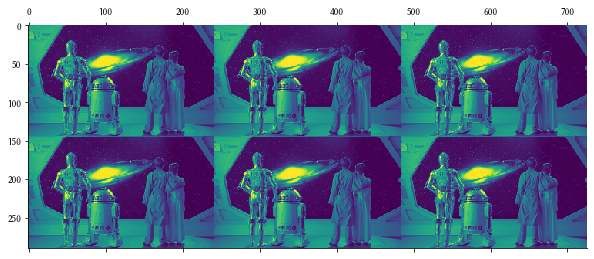

In [21]:
# Start from the matrix you downloaded with the fetch_image() function above.
# Now use np.concatenate to repeat the matrix 2 times vertically, and 3 times horizontally.
denoised_image = img[:, ::2]

# Hint: you will have to call np.concatenate twice to do it!
n_vert = 2
n_hor = 3
tiled_image = np.concatenate([denoised_image,]*n_vert, axis=0)
tiled_image = np.concatenate([tiled_image, ]*n_hor, axis=1)

# Use plt.matshow() to check the result
plt.matshow(tiled_image)

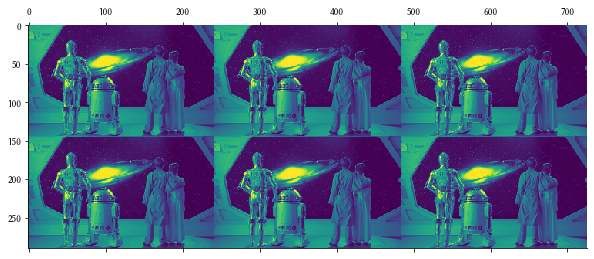

In [22]:
# Google (or chatGPT) how to use the np.tile() function to perform the same tiling using only one operation!

tiled_image = np.tile(denoised_image, (2,3))
plt.matshow(tiled_image)